In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#there is a relation between cabin and age
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [14]:
df.groupby('Survived')['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# techniques to handle missing values
mean/median/mode,
random sample imputation,
capturing nan values with new feature,
End of distribution,
arbitrary imputation,
frequent categories imputation.

In [24]:
#mean/ median/ mode imputation
#used when missing data completely at random
df=pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])

In [30]:
def impute_nan(df,variable,median):
  df[variable+'_median']=df[variable].fillna(median)

In [31]:
median=df.Age.mean()

In [32]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [33]:
df['Age'].std()

14.526497332334042

In [34]:
df['Age_median'].std()

13.002015226002882

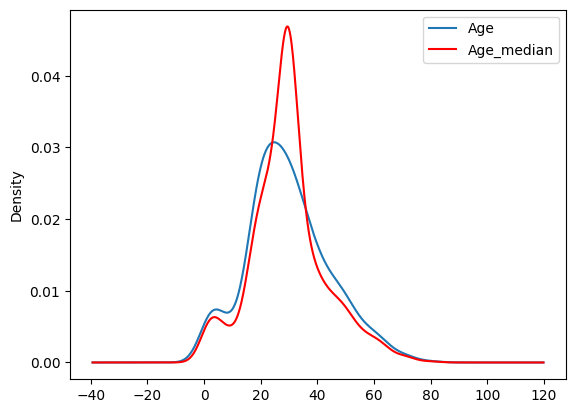

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages and disadvantages
1. Easy to implement (Robust to outliers)
2. Faster way to obtain the complete dataset
# Disadvantages
1. Distortion in the original variance
2. Impacts correlation